In [85]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d

import scipy as sc
import math as ma
from scipy import linalg, optimize, constants, interpolate, special, stats
from math import exp, pow, sqrt, log

import seaborn as sns 
import statsmodels.api as sm
import statsmodels.stats.api as sms

#Library für effiziente Berechnungen mit großen Matrizen -> DeepLearning!
import theano 
import tensorflow

 
#scikit-learn:

import sklearn as sl 
from sklearn import model_selection, metrics, datasets
from sklearn.preprocessing import OneHotEncoder 
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
#from sklearn.datasets import fetch_mldata
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

#wichtige Keras Funktionalitäten

import keras
from keras import layers
from keras.datasets import mnist
from keras.models import Model, Sequential
from keras.layers import Input, Dense, Dropout, Conv2D, MaxPooling2D, UpSampling2D, Flatten, Reshape, Activation
from keras import regularizers
from keras.models import Sequential
from keras import backend as K

from keras.optimizers import SGD, Adadelta, Adagrad, RMSprop #Stochastic Gradient Descent

from keras.utils import to_categorical

from matplotlib import pyplot as plt
from IPython.display import clear_output
#

In [86]:
#Import der MNIST Daten Seaice und Global 
pathSeaice ='/Users//milankaschneider/Desktop/Uni/7.Semester/AI/Daten/MNIST/seaice.csv'
pathGlobalTmpt ='/Users//milankaschneider/Desktop/Uni/7.Semester/AI/Daten/MNIST/GlobalTemperatures.csv'

Data_Seaice = pd.read_csv(pathSeaice)
Data_GlobalTmpt =pd.read_csv(pathGlobalTmpt)
Data_Seaice.dtypes

Year              int64
 Month            int64
 Day              int64
     Extent     float64
    Missing     float64
 Source Data     object
hemisphere       object
dtype: object

In [87]:
Data_Seaice.head() #Attribute festhalten/ Columnsfesthalten

,Year,Month,Day,Extent,Missing,Source Data,hemisphere
0,1978,10,26,10.231,0.0,['ftp://sidads.colorado.edu/pub/DATASETS/nsid...,north
1,1978,10,28,10.420,0.0,['ftp://sidads.colorado.edu/pub/DATASETS/nsid...,north
2,1978,10,30,10.557,0.0,['ftp://sidads.colorado.edu/pub/DATASETS/nsid...,north
3,1978,11,1,10.670,0.0,['ftp://sidads.colorado.edu/pub/DATASETS/nsid...,north
4,1978,11,3,10.777,0.0,['ftp://sidads.colorado.edu/pub/DATASETS/nsid...,north


In [88]:
#ToDo: Daten droppen, die sowieso nichts bringen 
# Rename notwendig, da bei dtypes Aufruf, die Attribute irgendwie eingerückt waren
Data_Seaice = Data_Seaice.rename(columns={'Year': 'Year', ' Month': 'Month', ' Day': 'Day', '     Extent': 'Extent', '    Missing' : 'Missing', ' Source Data': 'Source Data'});
Data_Seaice=Data_Seaice.drop(['Missing', 'Source Data'], axis=1) #Dropping via Index
#

In [89]:
Data_Seaice['DateTime'] = pd.to_datetime(Data_Seaice[['Year','Month','Day']])
#Data_Seaice['Datetime'] = pd.to_datetime(Data_Seaice.[['Day','Month','Year']], format='%Y-%m-%d')
#Data_Seaice['Date']=Data_Seaice[['Year','Month','Day']].apply(pd.to_datetime, format='%Y-%m-%d')

Data_Seaice.index=Data_Seaice['DateTime'].values
Data_Seaice.head()

,Year,Month,Day,Extent,hemisphere,DateTime
1978-10-26,1978,10,26,10.231,north,1978-10-26
1978-10-28,1978,10,28,10.420,north,1978-10-28
1978-10-30,1978,10,30,10.557,north,1978-10-30
1978-11-01,1978,11,1,10.670,north,1978-11-01
1978-11-03,1978,11,3,10.777,north,1978-11-03



## Darstellung Entwicklung der Eisbedeckung grafisch

In [90]:
northHemiphere_Seaice= Data_Seaice['north'== Data_Seaice['hemisphere']];
northHemiphere_Seaice_avg= northHemiphere_Seaice['1978-10-26':'2019-05-31'].resample('12M').mean();

southHemiphere_Seaice=Data_Seaice['south'==Data_Seaice['hemisphere']];
southHemiphere_Seaice_avg= southHemiphere_Seaice['1978-10-26':'2019-05-31'].resample('12M').mean();

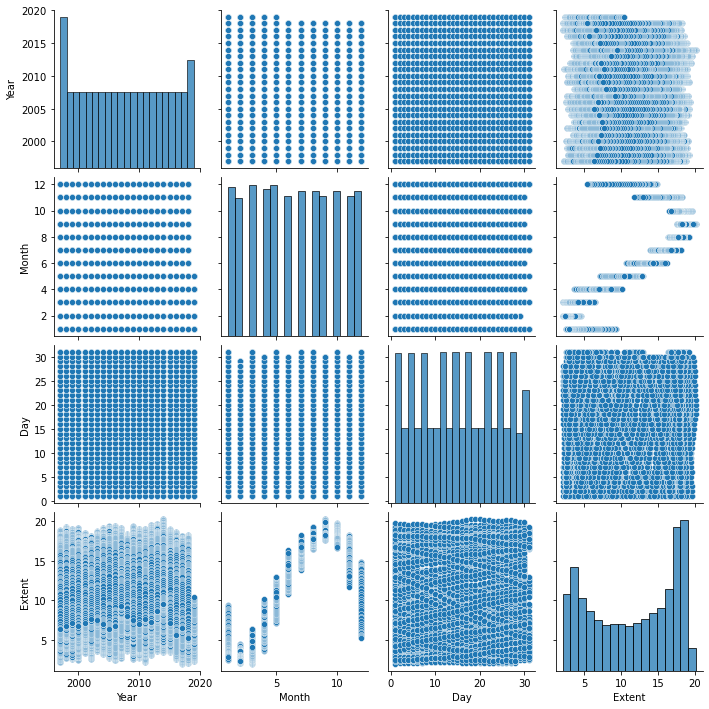

In [91]:
# Annahme: erneute drastischer Wandel der Klimaerwärmung ungefähr ab 1990-2000 --> Trend steigt kontinuierlich an
# --> Deswegen Datensatz ab 5000 
sns.pairplot(southHemiphere_Seaice.iloc[5000:]); 

In [92]:
#sns.pairplot(southHemiphere_Seaice.iloc[:5000]); 

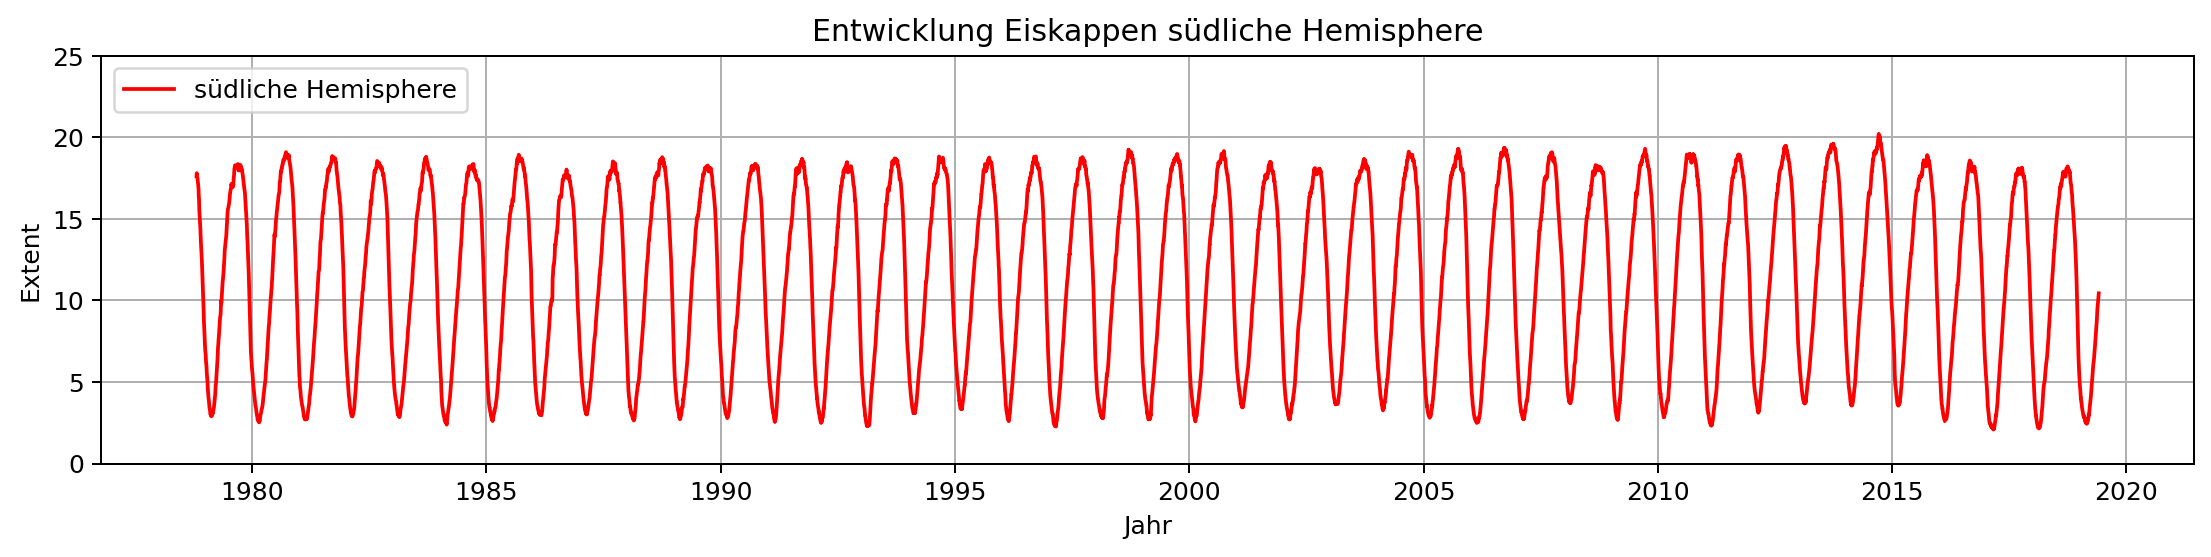

In [93]:
# Grafische Auswertung südliche Hemisphere

fig = plt.figure(figsize=(15,3), dpi=180);
ax = fig.add_subplot(111)
plt.ylabel('Extent'); 
plt.xlabel('Jahr');
plt.title('Entwicklung Eiskappen südliche Hemisphere');
plt.plot(southHemiphere_Seaice['DateTime'],southHemiphere_Seaice['Extent'] , 'r', label='südliche Hemisphere');

plt.ylim(0,25);
plt.grid();
plt.legend(loc='upper left');

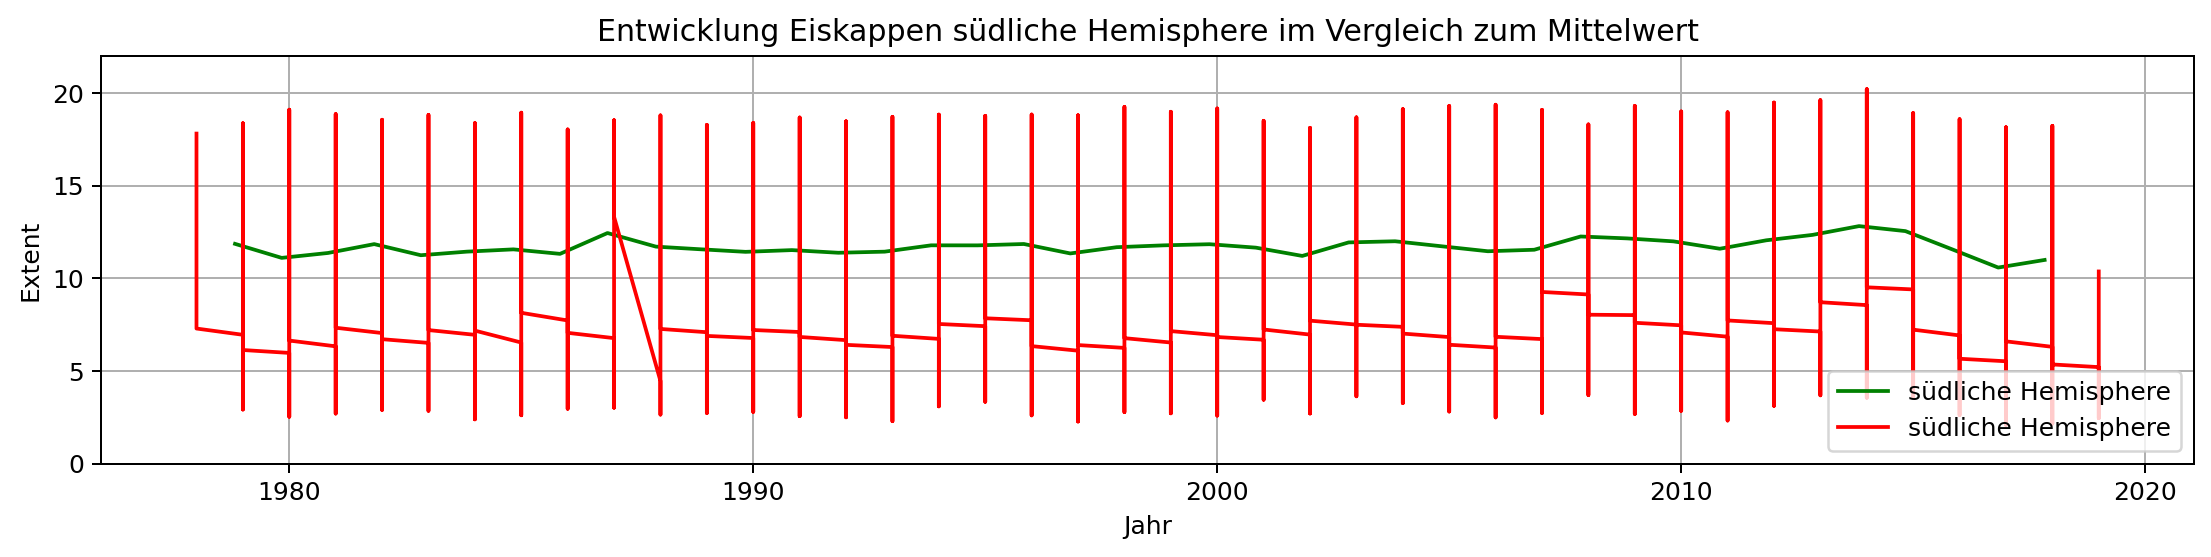

In [94]:
#Frage: Sieht nicht wirklich aussagekräftig aus?

fig = plt.figure(figsize=(15,3), dpi=180);
ax = fig.add_subplot(111)
plt.ylabel('Extent'); 
plt.xlabel('Jahr');
plt.title('Entwicklung Eiskappen südliche Hemisphere im Vergleich zum Mittelwert');

plt.plot(southHemiphere_Seaice_avg.Year[1:-1],southHemiphere_Seaice_avg.Extent[1:-1] , 'g', label='südliche Hemisphere');
plt.plot(southHemiphere_Seaice.Year[1:-1],southHemiphere_Seaice.Extent[1:-1], 'r', label='südliche Hemisphere');
#plt.xticks(southHemiphere_Seaice['Year'])

plt.ylim(0,22);
#plt.xlim(1980,2020)
plt.grid();
plt.legend(loc='lower right');

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


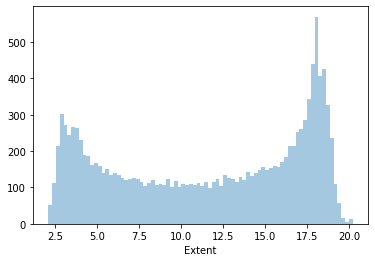

In [95]:
sns.distplot(southHemiphere_Seaice['Extent'], bins=80, kde=False);

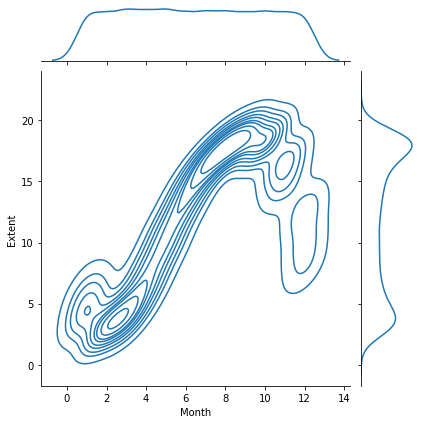

In [96]:
sns.jointplot(x="Month", y="Extent", data=southHemiphere_Seaice.iloc[5000:], kind='kde');

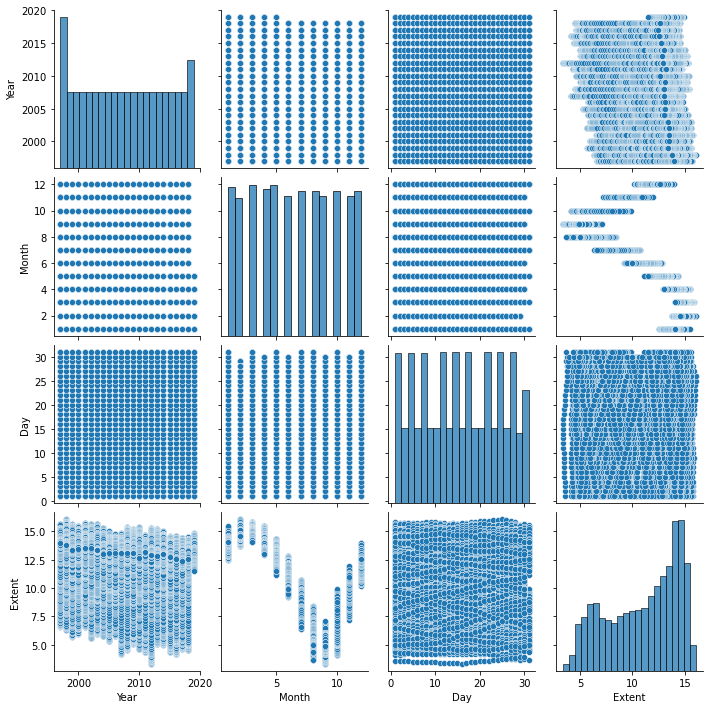

In [97]:
sns.pairplot(northHemiphere_Seaice.iloc[5000:]); 

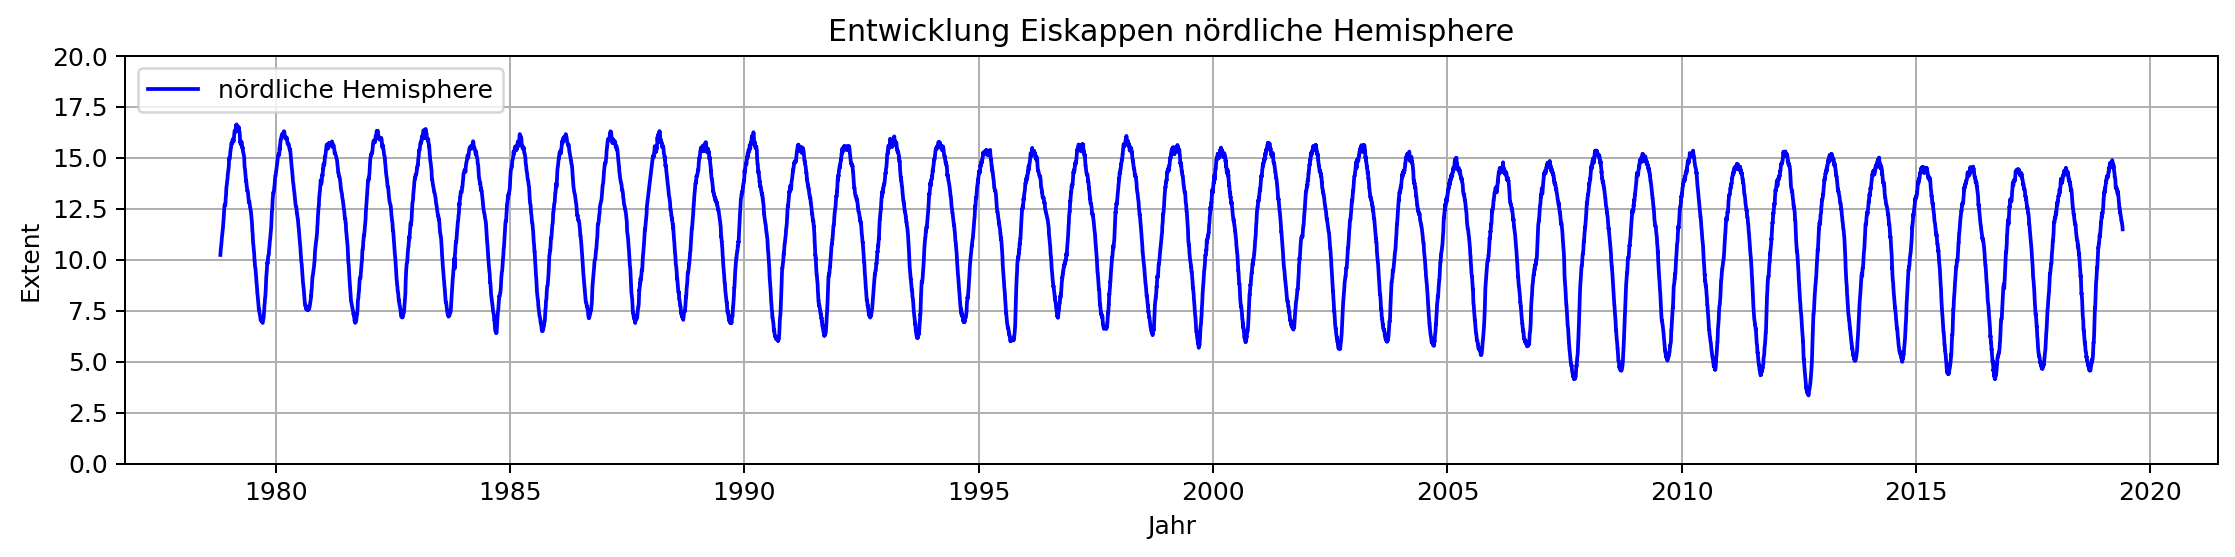

In [98]:
fig = plt.figure(figsize=(15,3), dpi=180);
ax = fig.add_subplot(111)
plt.ylabel('Extent'); 
plt.xlabel('Jahr');
plt.title('Entwicklung Eiskappen nördliche Hemisphere');
plt.plot(northHemiphere_Seaice['DateTime'],northHemiphere_Seaice['Extent'] , 'b', label='nördliche Hemisphere');

plt.ylim(0,20);
plt.grid();
plt.legend(loc='upper left');


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


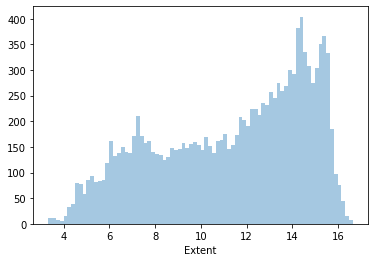

In [99]:
sns.distplot(northHemiphere_Seaice['Extent'], bins=80, kde=False);

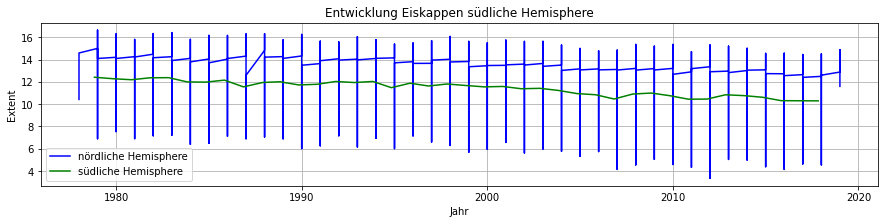

In [100]:
# Grafische Auswertung zweiter Versuch
#Annahme: Es sieht nicht wirklich toll aus(?)
fig = plt.figure(figsize=(15,3)) 
ax = fig.add_subplot(111)
plt.ylabel('Extent'); 
plt.xlabel('Jahr');
plt.title('Entwicklung Eiskappen südliche Hemisphere');
plt.plot(northHemiphere_Seaice.Year[1:-1],northHemiphere_Seaice.Extent[1:-1] , 'b', label='nördliche Hemisphere');
plt.plot(northHemiphere_Seaice_avg.Year[1:-1],northHemiphere_Seaice_avg.Extent[1:-1] , 'g', label='südliche Hemisphere');

plt.grid();
plt.legend(loc='lower left'); 

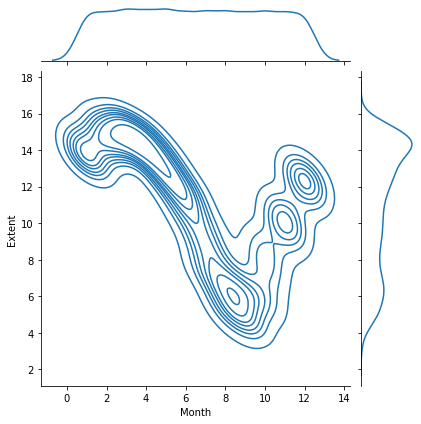

In [101]:
sns.jointplot(x="Month", y="Extent", data=northHemiphere_Seaice.iloc[5000:], kind='kde');

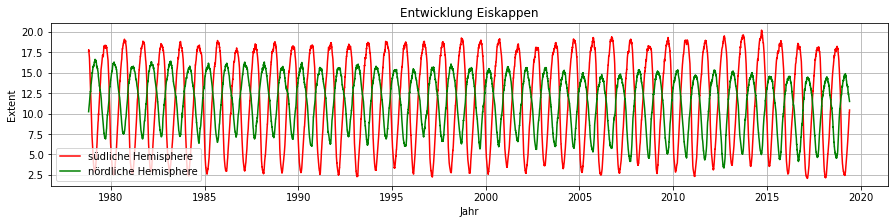

In [102]:
# Grafische Auswertung Vergleich nördliche Hemisphere und südliche Hemisphere

fig = plt.figure(figsize=(15,3)) 
plt.ylabel('Extent'); 
plt.xlabel('Jahr');
plt.title('Entwicklung Eiskappen');

plt.plot(southHemiphere_Seaice['DateTime'],southHemiphere_Seaice['Extent'] , 'r', label='südliche Hemisphere');
plt.plot(northHemiphere_Seaice['DateTime'],northHemiphere_Seaice['Extent'] , 'g', label='nördliche Hemisphere');
plt.grid();
plt.legend(); 

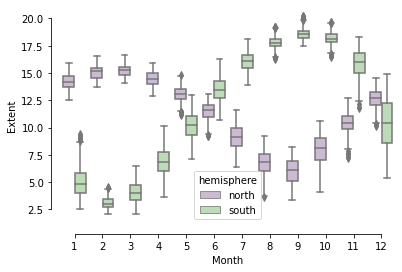

In [103]:
sns.boxplot(x="Month", y="Extent",hue="hemisphere", data=Data_Seaice, palette="PRGn")
sns.despine(offset=10, trim=True)

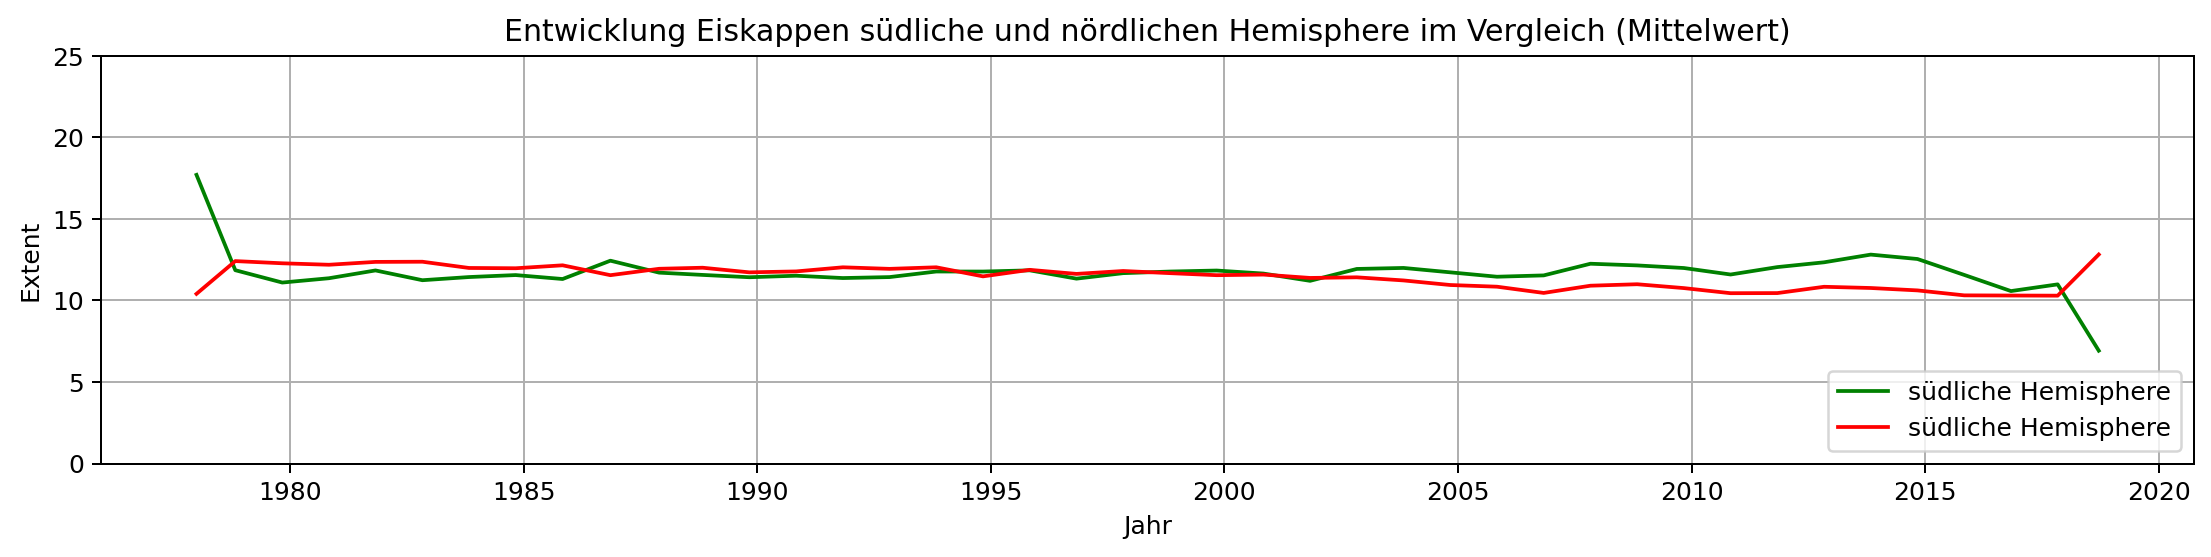

In [104]:
fig = plt.figure(figsize=(15,3), dpi=180);
ax = fig.add_subplot(111)
plt.ylabel('Extent'); 
plt.xlabel('Jahr');
plt.title('Entwicklung Eiskappen südliche und nördlichen Hemisphere im Vergleich (Mittelwert)');

plt.plot(southHemiphere_Seaice_avg.Year,southHemiphere_Seaice_avg.Extent, 'g', label='südliche Hemisphere');
plt.plot(northHemiphere_Seaice_avg.Year,northHemiphere_Seaice_avg.Extent, 'r', label='südliche Hemisphere');
#plt.xticks(southHemiphere_Seaice['Year'])

plt.ylim(0,25);
#plt.xlim(1980,2020)
plt.grid();
plt.legend(loc='lower right');

# Datenseparation fürs Training und Modellvalidierung

In [105]:
Data_Seaice.head()

,Year,Month,Day,Extent,hemisphere,DateTime
1978-10-26,1978,10,26,10.231,north,1978-10-26
1978-10-28,1978,10,28,10.420,north,1978-10-28
1978-10-30,1978,10,30,10.557,north,1978-10-30
1978-11-01,1978,11,1,10.670,north,1978-11-01
1978-11-03,1978,11,3,10.777,north,1978-11-03


In [106]:
Data_Seaice['DateTime'].max()

Timestamp('2019-05-31 00:00:00')

In [107]:
#Um ganauere Ergebnisse zu erzielen, sollten Daten verwendet werden, die in den Zeitraum der täglichen Bemessungen berücksichtigt wurden
# --> Dementsprechend vom 20.08.1987 bis 31.05.2019
# Gelegenlich wird hier AssertionError: <class 'numpy.ndarray'> geworfen .... im Wechsel Data_Seaice.DateTime['1987-08-20':'2019-05-31']und Data_Seaice["1987-08-20":"2019-05-31"]

#Data_Seaice= Data_Seaice["1987-08-20":"2019-05-31"]

Data_Seaice.DateTime['1987-08-20':'2019-05-31']

#Data_Seaice["1987-08-20":"2019-05-31"]

1987-08-20   1987-08-20
1987-08-21   1987-08-21
1987-08-22   1987-08-22
1987-08-23   1987-08-23
1987-08-24   1987-08-24
                ...    
2019-05-27   2019-05-27
2019-05-28   2019-05-28
2019-05-29   2019-05-29
2019-05-30   2019-05-30
2019-05-31   2019-05-31
Name: DateTime, Length: 23134, dtype: datetime64[ns]

In [108]:
xData_Seaice=np.arange(1,11572,1)


In [109]:
xTrainData_Seaice=xData_Seaice[0:8679] #24 Jahre
xValData_Seaice=xData_Seaice[8680:] #8 Jahre

In [110]:
Data_Seaice_Train=Data_Seaice[0:8679]
Data_Seaice_Valid=Data_Seaice[8680:]

#print(Data_Seaice_Train)
#print(Data_Seaice_Valid)

#--> FRAGE: Macht es Sinn, die Daten so in Train und Valid aufzuteilen?
#--> FRAGE: Wäre es besser die Train und Valid Daten in südliche und nördilche Hemiphere auzuteilen?

In [119]:
#slope, intercept, r_value, p_value, std_err = stats.linregress(xTrainData_Seaice,Data_Seaice_Train)

# Error wird geworfen: UFuncTypeError: ufunc 'add' cannot use operands with types dtype('<M8[ns]') and dtype('<M8[ns]')

#--> FRAGE: Könnten Sie mir event. ein Hinweis geben, wie ich folglich am besten vorangehen könnte bzgl. der linearen Regression?



In [128]:
"""
Lineare Funktion laut https://data-science-blog.com/blog/2017/10/17/lineare-regression-in-python-scitkit-learn/

Jedoch bin ich mir unsicher, ob dieses Vorgehen tatsächlich die Aufgabe sinngemäß erfüllen würde

Und wenn dieses Verfahren doch verwendbar wäre, ist dann ein BSABABA erforderlich?
--> xTrainData_Seaice=xData_Seaice[0:8679]
"""
yData_Seaice=np.arange(1,11572,1)

yTrainData_Seaice= Data_Seaice_Train['Extent'].values  #24 Jahre
yValData_Seaice=Data_Seaice_Valid['Extent'].values

yTrainData_Seaice.reshape(-1, 1)
xTrainData_Seaice.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(xTrainData_Seaice, yTrainData_Seaice, test_size = 0.2, shuffle=False)

LinReg = LinearRegression();                            

#Fehlermeldung ValueError: Expected 2D array, got 1D array instead: array=[   1    2    3 ... 6941 6942 6943].Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.
#LinReg.fit(xTrainData_Seaice, yTrainData_Seaice)                           

ValueError: Expected 2D array, got 1D array instead:
array=[   1    2    3 ... 8677 8678 8679].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [117]:
#TODO ARMAX, laut Skript autoreg. Modell 

In [ ]:
#TODO ACF, laut Skript 

In [ ]:
#TODO PACF, laut Skript